# CS5228-KDDM, 2025/26-2, Coursework 1

### Introduction


#### Student Name: 
#### Student Number: 

## CW1, Part 3: MCQs (4x1= 4 marks)

### Q1. 
Data ﬁle cw1-mcq1.csv contains data samples of a given experiment in the 2d feature space, <f1,f2>. There are 39 data samples in that ﬁle. Which clustering algorithm may be the most successful one, and what is a good guess for k or the number of clusters?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting

In [3]:
# load data
df = pd.read_csv('cw1-mcq1.csv')   
print(f"Data shape: {df.shape}")
df.head()

Data shape: (39, 2)


,f1,f2
0,0.2437,0.9885
1,0.2107,0.9059
2,0.1759,0.8697
3,0.1472,0.8179
4,0.0817,0.7909


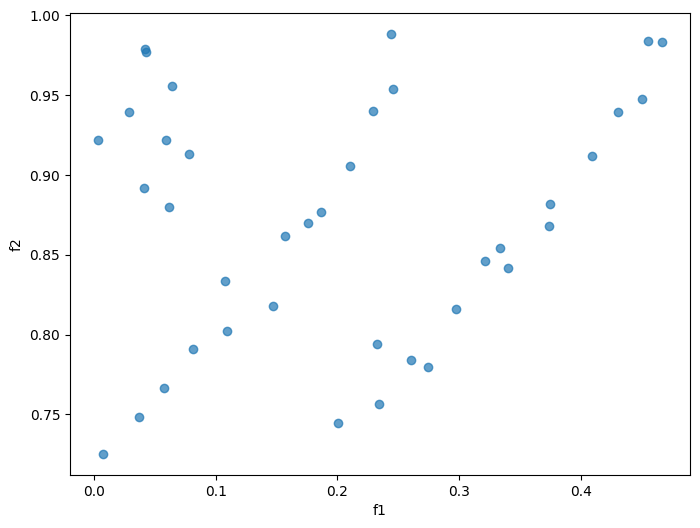

In [5]:
# 2d scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['f1'], df['f2'], alpha=0.7)
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

Visual scan shows 3 clusters.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
# K-means scores (Inertia)
inertia = []
for k in [2, 3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
    print(f"KMeans k={k} inertia: {km.inertia_}")
    
# DBSCAN
# We need to guess epsilon.
for eps in [0.5, 0.1, 0.05]:
    db = DBSCAN(eps=eps, min_samples=3).fit(df) 
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    print(f"DBSCAN clusters (eps={eps}): {n_clusters}")

# print the sorted values to see if there are clear gaps
print("Sorted f1:", sorted(df['f1'].values))

KMeans k=2 inertia: 0.4239231301315789
KMeans k=3 inertia: 0.2692043559327731
KMeans k=4 inertia: 0.17981048888888884
DBSCAN clusters (eps=0.5): 1
DBSCAN clusters (eps=0.1): 1
DBSCAN clusters (eps=0.05): 3
Sorted f1: [np.float64(0.0035), np.float64(0.0071), np.float64(0.029), np.float64(0.0374), np.float64(0.0408), np.float64(0.0416), np.float64(0.0426), np.float64(0.0574), np.float64(0.0594), np.float64(0.062), np.float64(0.0643), np.float64(0.078), np.float64(0.0817), np.float64(0.1075), np.float64(0.1097), np.float64(0.1472), np.float64(0.157), np.float64(0.1759), np.float64(0.1868), np.float64(0.2007), np.float64(0.2107), np.float64(0.2295), np.float64(0.2324), np.float64(0.2339), np.float64(0.2437), np.float64(0.2454), np.float64(0.2604), np.float64(0.2747), np.float64(0.2973), np.float64(0.3213), np.float64(0.3334), np.float64(0.3405), np.float64(0.3741), np.float64(0.375), np.float64(0.4088), np.float64(0.4301), np.float64(0.4503), np.float64(0.455), np.float64(0.4665)]


KMeans k=2 silhouette score: 0.4584
KMeans k=3 silhouette score: 0.4183
KMeans k=4 silhouette score: 0.4466
KMeans k=5 silhouette score: 0.5238
KMeans k=6 silhouette score: 0.5529
KMeans k=7 silhouette score: 0.5521
KMeans k=8 silhouette score: 0.5021
KMeans k=9 silhouette score: 0.5108
KMeans k=10 silhouette score: 0.4931


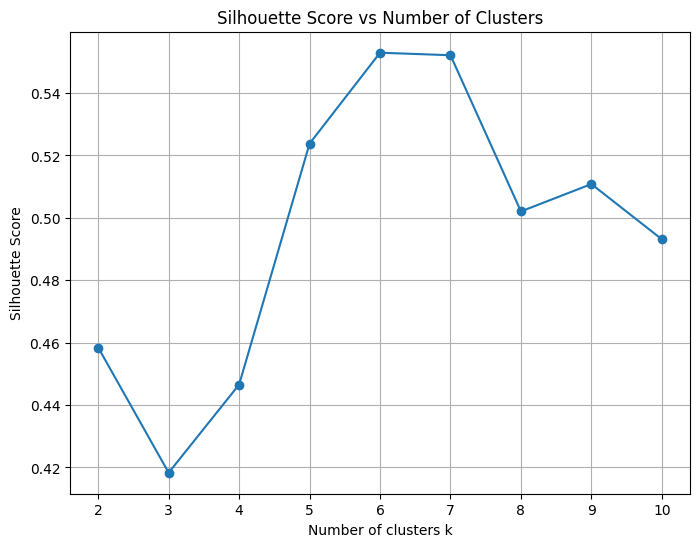

In [11]:
# silhouette coefficient
from sklearn.metrics import silhouette_score
sil_scores = []
for k in [2, 3, 4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
    labels = km.labels_
    sil_score = silhouette_score(df, labels)
    print(f"KMeans k={k} silhouette score: {sil_score:.4f}")
    sil_scores.append((k, sil_score))

# plot silhouette scores
k_vals, scores = zip(*sil_scores)
plt.figure(figsize=(8, 6))
plt.plot(k_vals, scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_vals)
plt.grid()
plt.show()

### Q2
Regarding the Part 3-MCQ 1 data, above, apply a Z-transform (normalization) on both f1 and f2 features/attributes to bring them between 0 and 1. What is the summation of the features f1 and f2 after normalization?

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = scaler.fit_transform(df) # df is the original dataframe from Q1
sum_f1 = np.sum(df_norm[:, 0])
sum_f2 = np.sum(df_norm[:, 1])

print(f"Sum f1: {sum_f1}")
print(f"Sum f2: {sum_f2}")

Sum f1: -5.218048215738236e-15
Sum f2: -3.985700658404312e-14


Mathematical property: Sum of Z-scores is ALWAYS 0 (or very close to 0 due to float precision).

Mean is 0. Sum = Mean * N = 0 * N = 0.

### Q3
Three data samples, A, B, and C, are represented by 3 numerical attributes/features each. We can clearly assume that a 3-element vector represents each data sample, called the feature or attribute vector, in a 3d feature space. What are the cosine similarity factors between vectors A and B, and between A and C? If you refer to the slides, you will see that the inner product can be used to compute the cosine similarity between vectors.

In [8]:
A = np.array([3.14, -2.21, 4.14])
B = np.array([8, -6.5, 4.1])
C = np.array([-1.4, -2.2, -3.9])

cos_AB = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
cos_AC = np.dot(A, C) / (np.linalg.norm(A) * np.linalg.norm(C))

print(f"Cosine(A, B) = {cos_AB}")
print(f"Cosine(A, C) = {cos_AC}")

Cosine(A, B) = 0.9013492329717478
Cosine(A, C) = -0.5919082650941278


### Q4
The table below shows 7 data samples and 4 attributes/features. If we apply an AGNES hierarchical clustering algorithm and employ Euclidean distance as the linkage metric, we come across the dendrogram below. What are the ﬁrst [x5,x6] and second [x1,x2] data samples clustered together?

In [9]:
from scipy.spatial.distance import pdist, squareform

data = {
        'A': [156.2, 105, 172.7, 122],
        'B': [162.6, 122, 172.7, 120],
        'C': [183, 130, 170.2, 125],
        'D': [198, 243, 183, 176],
        'E': [182, 181, 193, 220],
        'F': [192, 201, 182, 174],
        'G': [160, 105, 157, 120]
    }
    
labels = list(data.keys())
matrix = np.array(list(data.values()))

dists = pdist(matrix, metric='euclidean')
dist_matrix = squareform(dists)

print("Distance Matrix:")
print(dist_matrix)

Distance Matrix:
[[  0.          18.2745725   36.85769933 154.31568294 128.28768452
  115.27415148  16.27667042]
 [ 18.2745725    0.          22.61437596 138.33383534 119.45480317
  100.53780384  23.28626204]
 [ 36.85769933  22.61437596   0.         125.53421844 110.21270344
   87.53422188  36.78641053]
 [154.31568294 138.33383534 125.53421844   0.          78.33262411
   42.48529157 155.88457268]
 [128.28768452 119.45480317 110.21270344  78.33262411   0.
   52.31634544 132.4990566 ]
 [115.27415148 100.53780384  87.53422188  42.48529157  52.31634544
    0.         117.39250402]
 [ 16.27667042  23.28626204  36.78641053 155.88457268 132.4990566
  117.39250402   0.        ]]


In [ ]:

# Find closest pair
min_dist = np.inf
p1, p2 = -1, -1

for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        d = dist_matrix[i, j]
        if d < min_dist:
            min_dist = d
            p1, p2 = i, j
            
print(f"Closest pair (1st merge): {labels[p1]}, {labels[p2]} with dist {min_dist}")


In [10]:

# Mask this pair and find next closest pair (assuming naive approach, or next in dendrogram)
# The dendrogram shows (x1, x2) as a separate merge from (x5, x6).
# So we look for the 2nd closest pair in the matrix excluding the first pair?
# Or just the 2nd smallest distance in the whole matrix.

pairs = []
for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        pairs.append((dist_matrix[i, j], labels[i], labels[j]))
        
pairs.sort()
print("Sorted pairs:")
for p in pairs[:5]:
    print(p)

Sorted pairs:
(np.float64(16.27667042118872), 'A', 'G')
(np.float64(18.27457249841977), 'A', 'B')
(np.float64(22.614375958668422), 'B', 'C')
(np.float64(23.28626204439003), 'B', 'G')
(np.float64(36.78641053432639), 'C', 'G')
